# Question 1

Using the given MT cars dataset you need to find outlier with Z score

In [5]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns
import os
os.chdir("C:\Datasets")


In [6]:
df= pd.read_csv("mtcars.csv")

In [7]:
import pandas as pd
mtcars= pd.read_csv("mtcars.csv")
mtcars.index = mtcars.model
mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,,
Mazda RX4,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [8]:
mtcars.min()

model    AMC Javelin
mpg             10.4
cyl                4
disp            71.1
hp                52
drat            2.76
wt             1.513
qsec            14.5
vs                 0
am                 0
gear               3
carb               1
dtype: object

In [9]:
mtcars.mean()

mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

In [10]:
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [11]:
mtcars.max()

model    Volvo 142E
mpg            33.9
cyl               8
disp            472
hp              335
drat           4.93
wt            5.424
qsec           22.9
vs                1
am                1
gear              5
carb              8
dtype: object

In [12]:
mtcars.sample(5)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,,
Fiat 128,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
Pontiac Firebird,Pontiac Firebird,19.2,8,400.0,175,3.08,3.845,17.05,0,0,3,2
Chrysler Imperial,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4
Merc 280C,Merc 280C,17.8,6,167.6,123,3.92,3.440,18.90,1,0,4,4
Dodge Challenger,Dodge Challenger,15.5,8,318.0,150,2.76,3.520,16.87,0,0,3,2


Text(0, 0.5, 'carb')

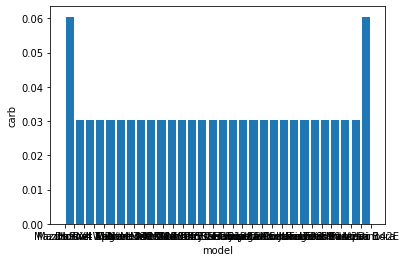

In [13]:
from scipy.stats import norm
import numpy as np

plt.hist(df.model,bins=30,rwidth= 0.8, density =True)
plt.xlabel("model")
plt.ylabel("carb")



In [14]:
mtcars.std()

mpg       6.026948
cyl       1.785922
disp    123.938694
hp       68.562868
drat      0.534679
wt        0.978457
qsec      1.786943
vs        0.504016
am        0.498991
gear      0.737804
carb      1.615200
dtype: float64

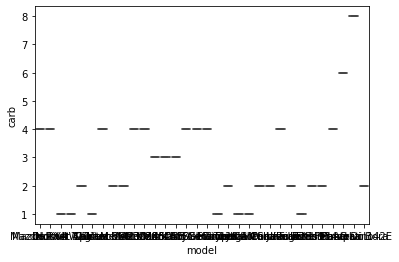

In [15]:
sns.boxplot(y='carb', x= 'model', data=mtcars)

In [16]:
df.carb.std()

1.6151999776318522

In [17]:
df.carb.mean()

2.8125

In [18]:
upper_limit = df.carb.mean() +3*df.carb.std()
upper_limit


7.658099932895556

In [19]:
lower_limit=df.carb.mean() -3*df.carb.std()
lower_limit

-2.0330999328955563

In [20]:
df[(df.carb>upper_limit)| (df.carb<lower_limit)]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8


In [21]:
df[(df.carb<upper_limit)&(df.carb>lower_limit)]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [22]:
df["zscore"]=(df.carb - df.carb.mean())/df.carb.std()
df.head(5)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,zscore
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,0.735203
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,0.735203
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,-1.122152
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,-1.122152
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,-0.503034


In [23]:
(4-2.8125)/1.6151999776318522

0.7352030810086251

In [24]:
df[df["zscore"]>3] 

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,zscore
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8,3.211677


In [25]:
df[df["zscore"]<3]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,zscore
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,0.735203
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,0.735203
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,-1.122152
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,-1.122152
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,-0.503034
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,-1.122152
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0.735203
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,-0.503034
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,-0.503034
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,0.735203


In [26]:
df_no_outliers = df[(df.zscore>-3)&(df.zscore<3)]
df_no_outliers.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,zscore
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,0.735203
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,0.735203
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,-1.122152
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,-1.122152
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,-0.503034


# Question 2

Using the Boston set from sklearn , find outlier and treat them

In [27]:
import os

os.chdir('C:\Datasets')


In [28]:
df= pd.read_csv("bostoncars.csv")

In [29]:
import pandas as pd
bostoncars= pd.read_csv("bostoncars.csv")
bostoncars.index = bostoncars.Car
bostoncars.head()

,Car,Model,Volume,Weight,CO2
Car,,,,,
Toyota,Toyota,Aygo,1000,790,99
Mitsubishi,Mitsubishi,Space Star,1200,1160,95
Skoda,Skoda,Citigo,1000,929,95
Fiat,Fiat,500,900,865,90
Mini,Mini,Cooper,1500,1140,105


In [30]:
bostoncars.describe()

,Volume,Weight,CO2
count,36.000000,36.000000,36.000000
mean,1611.111111,1292.277778,102.027778
std,388.975047,242.123889,7.454571
min,900.000000,790.000000,90.000000
25%,1475.000000,1117.250000,97.750000
50%,1600.000000,1329.000000,99.000000
75%,2000.000000,1418.250000,105.000000
max,2500.000000,1746.000000,120.000000


In [31]:
bostoncars.tail()

,Car,Model,Volume,Weight,CO2
Car,,,,,
Volvo,Volvo,XC70,2000,1746,117
Ford,Ford,B-Max,1600,1235,104
BMW,BMW,2,1600,1390,108
Opel,Opel,Zafira,1600,1405,109
Mercedes,Mercedes,SLK,2500,1395,120


In [32]:
bostoncars.min()

Car       Audi
Model        1
Volume     900
Weight     790
CO2         90
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028C2F388AC8>]],
      dtype=object)

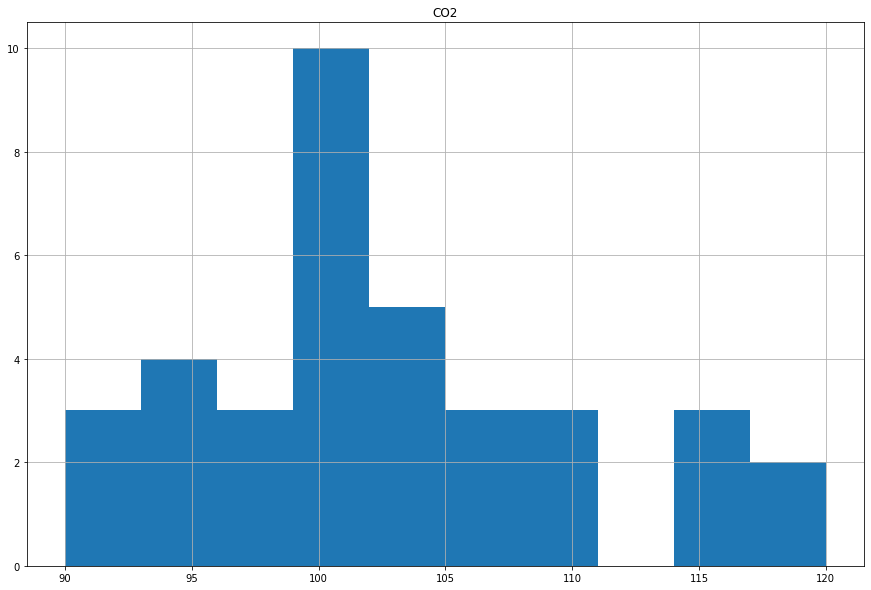

In [33]:
from scipy.stats import norm
import numpy as np
%matplotlib inline
bostoncars.hist(column="CO2",figsize=(15,10))


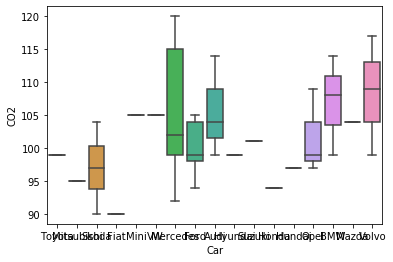

In [46]:
sns.boxplot(y='CO2', x= 'Car', data=bostoncars)

In [48]:
df.CO2.std()

7.454571410928659

In [49]:
df.CO2.mean()

102.02777777777777

In [50]:
upper_limit = df.CO2.mean() +3*df.CO2.std()
upper_limit


124.39149201056375

In [51]:
lower_limit = df.CO2.mean()-3*df.CO2.std()
lower_limit

79.66406354499179

In [52]:
df["zscore"]=(df.CO2- df.CO2.mean())/df.CO2.std()
df.head(5)

,Car,Model,Volume,Weight,CO2,zscore
0,Toyota,Aygo,1000,790,99,-0.406164
1,Mitsubishi,Space Star,1200,1160,95,-0.942747
2,Skoda,Citigo,1000,929,95,-0.942747
3,Fiat,500,900,865,90,-1.613477
4,Mini,Cooper,1500,1140,105,0.398711


In [53]:
df[df["zscore"]<3]

,Car,Model,Volume,Weight,CO2,zscore
0,Toyota,Aygo,1000,790,99,-0.406164
1,Mitsubishi,Space Star,1200,1160,95,-0.942747
2,Skoda,Citigo,1000,929,95,-0.942747
3,Fiat,500,900,865,90,-1.613477
4,Mini,Cooper,1500,1140,105,0.398711
5,VW,Up!,1000,929,105,0.398711
6,Skoda,Fabia,1400,1109,90,-1.613477
7,Mercedes,A-Class,1500,1365,92,-1.345185
8,Ford,Fiesta,1500,1112,98,-0.540310
9,Audi,A1,1600,1150,99,-0.406164


In [54]:
df[df["zscore"]>3]

,Car,Model,Volume,Weight,CO2,zscore


In [55]:
df[(df.zscore<3) |(df.zscore>3)]

,Car,Model,Volume,Weight,CO2,zscore
0,Toyota,Aygo,1000,790,99,-0.406164
1,Mitsubishi,Space Star,1200,1160,95,-0.942747
2,Skoda,Citigo,1000,929,95,-0.942747
3,Fiat,500,900,865,90,-1.613477
4,Mini,Cooper,1500,1140,105,0.398711
5,VW,Up!,1000,929,105,0.398711
6,Skoda,Fabia,1400,1109,90,-1.613477
7,Mercedes,A-Class,1500,1365,92,-1.345185
8,Ford,Fiesta,1500,1112,98,-0.540310
9,Audi,A1,1600,1150,99,-0.406164


In [56]:
df_no_outliers =df[(df.zscore>-3)&(df.zscore<3)]
df_no_outliers.head()

,Car,Model,Volume,Weight,CO2,zscore
0,Toyota,Aygo,1000,790,99,-0.406164
1,Mitsubishi,Space Star,1200,1160,95,-0.942747
2,Skoda,Citigo,1000,929,95,-0.942747
3,Fiat,500,900,865,90,-1.613477
4,Mini,Cooper,1500,1140,105,0.398711


In [57]:
df.shape[0]-df_no_outliers.shape[0]

0